In [3]:
import pandas as pd
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
X = digits.data
y = digits.target

In [7]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [36]:
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(df)

StandardScaler()

In [31]:
X_scaled = scaler.transform(df)

In [32]:
X_scaled

array([[ 0.        , -3.2901546 , -1.23994491, ..., -4.25673719,
        -2.48412579, -1.88245267],
       [ 0.        , -3.2901546 , -4.78042708, ...,  0.34123176,
        -2.48412579, -1.88245267],
       [ 0.        , -3.2901546 , -4.78042708, ...,  3.10001313,
         6.12663004, -1.88245267],
       ...,
       [ 0.        , -3.2901546 , -4.07233065, ..., -1.49795582,
        -2.48412579, -1.88245267],
       [ 0.        , -3.2901546 , -3.36423421, ...,  1.26082555,
        -2.48412579, -1.88245267],
       [ 0.        , -3.2901546 ,  2.30053727, ...,  1.26082555,
        -1.52737514, -1.88245267]])

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', gamma='scale')  # Experimentation with Kernels
svm_model.fit(X_train, y_train)

SVC()

In [43]:
y_pred_train = svm_model.predict(X_train)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_train, y_pred_train)

0.9323786793953859

In [38]:
y_pred = svm_model.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.9055555555555556

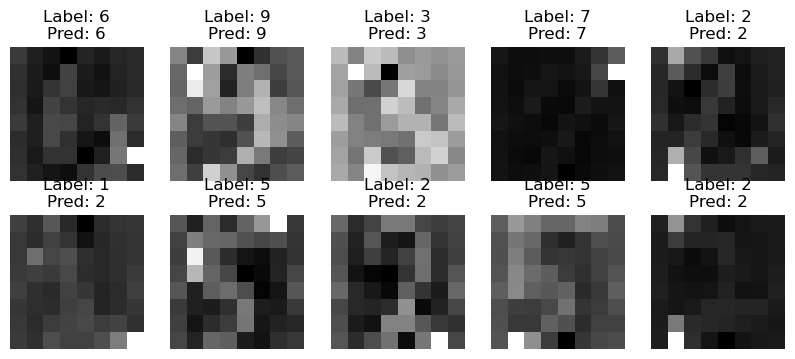

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f'Label: {y_test[i]}\nPred: {y_pred[i]}')
    plt.axis('off')
plt.show()
